# **CSCI-6409:  Project - Online EKYC Verification using Deep Learning**

## **Authors**

- [Nilesh Gupta (B00876771)](mailto:nl589531@dal.ca)





# **Business Problem**


**With the rapid increase in Covid-19 viruses across the globe, it has now become difficult to meet in person to present personal identification documents. For instance, one such process is KYC(Know Your Customer) which is a mandatory requirement as proof to open a bank account. Today, KYC enables businesses to track, access, and verify customer identities, allowing businesses to mitigate the risks associated with manual verification that leaves room for errors.
KYC verification process can be daunting sometimes resulting in unavoidable delays of verification since personal information is confidential and cannot be attended without absence of the concerned individual.**

**Hence to overcome this issue we are uploading their id proofs, extracting, comparing them and eventually performing real time liveliness detection to find the real identity of the customer.**

# **Data Preparation & Pre Processing For Training Image Data**

**For Extracting Face from the data We gathered various types of documents/Id cards and labelled the face part in the documents.For Labelling the ID's we have used Label IMG**

In [ ]:
from matplotlib import image as matimg
import matplotlib.pyplot as plt

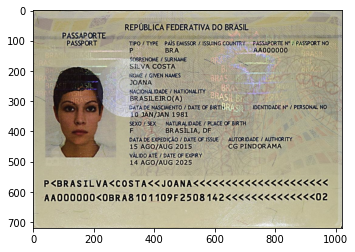

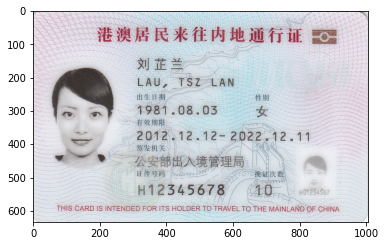

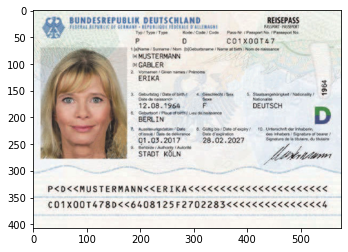

In [ ]:
img = matimg.imread('/content/Ids/06_bra_passport.jpg')
imgplot = plt.imshow(img)
plt.show()

img = matimg.imread('/content/Ids/08_chn_homereturn.jpg')
imgplot = plt.imshow(img)
plt.show()

img = matimg.imread('/content/Ids/16_deu_passport_new.jpg')
imgplot = plt.imshow(img)
plt.show()

**Next we label the images using any labelling library, in this case we will be using LabelIMG**

In [ ]:
!pip install labelImg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 247 kB 29.5 MB/s 
     |████████████████████████████████| 8.4 MB 38.7 MB/s 
     |████████████████████████████████| 59.9 MB 1.2 MB/s 
     |████████████████████████████████| 344 kB 75.2 MB/s 
  Created wheel for labelImg: filename=labelImg-1.8.6-py2.py3-none-any.whl size=261544 sha256=8201aba3444e905ec4cf563d24e48d16cef06587511b315c812b83093d8649db
  Stored in directory: /root/.cache/pip/wheels/6e/83/14/df9548a7a658185c419c9bb21eeae66b13307c28881a37e151
Successfully built labelImg


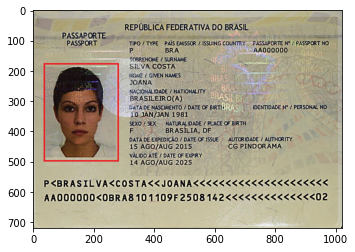

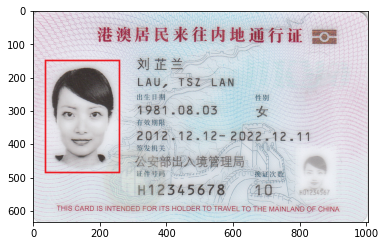

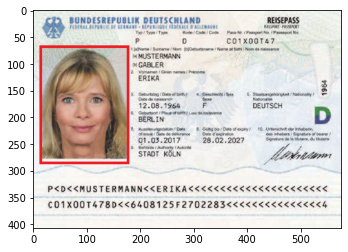

In [ ]:
img = matimg.imread('/content/Labelled_Ids/Labelled_bra_passport.jpg')
imgplot = plt.imshow(img)
plt.show()

img = matimg.imread('/content/Labelled_Ids/Labelled_chn_homereturn.jpg')
imgplot = plt.imshow(img)
plt.show()

img = matimg.imread('/content/Labelled_Ids/Labelled_deu_passport_new.jpg')
imgplot = plt.imshow(img)
plt.show()

**LabelIMG generates a XML file with co-ordinated of the labelled part. 
The labelled image data and the XML file is sent to the Deep Learning Model for Training**

# **Face Detection & Extraction Using Open CV and Blob**



**OpenCV - OpenCV is a machine learning algorithm to search images from the large dataset. Open CV internally uses machine learning algorithms to search for faces within a picture.**

**#Installing OpenCv Libraries**

In [ ]:
!pip3 install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing all the required libraries used within the project**

In [ ]:
import cv2
import glob
import matplotlib.pyplot as plt
from matplotlib import image as matimg

**OpenCV cascade breaks the problem of detecting faces into multiple stages. Hence, in our project we are using Haar feature-based cascade. Haar based cascade classifiers is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. Haarcascade_frontalface_default.xml contains the classifiers for face eyes smiles in xml format. It contains pre-trained model classifiers for face, eyes, smiles, etc to detect these attributes from the raw images**

In [ ]:
face_cascade = cv2.CascadeClassifier("HaarCascade_XML/haarcascade_frontalface_default.xml")

In [ ]:
file = 'photos/sample_selfie.jpg'


**First we are reading the sample selfie image using open cv imread function. The image read are convert from RGB/BGR to Gray as grayscale simplifies the algorithm and reduces computational requirements for image processing.Haar cascade classifier for frontalface is used to classify image. Based on classification the images are passed to detectMultiScale function will return a list of bounding boxes enin the form of rectangle for all faces detected in the photograph. These images are then saved as output file.**

In [ ]:
image = cv2.imread(file)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faceCascade = cv2.CascadeClassifier("HaarCascade_XML/haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=3,
    minSize=(30, 30)
)

print("[INFO] Found {0} Faces!".format(len(faces)))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

status = cv2.imwrite('photos/faces_detected.jpg', image)

[INFO] Found 1 Faces!


**Plotting the face from the input image using matplotlib library for the sample image**

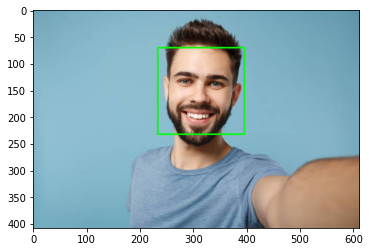

In [ ]:
img = matimg.imread('photos/faces_detected.jpg')
imgplot = plt.imshow(img)
plt.show()

# **Face Detection & Extraction Using MTCNN**

**MTCNN or Multi-Task Cascaded Convolutional Neural Networks is a neural network which detects faces and facial landmarks on images.The Multi CNN model works on 3 stages                                           1) The first step is to take the image and resize it to different scales in order to build an image pyramid, which is the input of the following three-staged cascaded network and  produce candidate windows.                                                                        2) The proposed candidate windows are refined through a more complex CNN called R-Net which reduces the number of candidates, performs calibration with bounding box regression and employs non-maximum suppression (NMS) to merge overlapping candidates.  
3) In the final stage it escribes the face in more detail and output the five facial landmarks’ positions for eyes, nose and mouth.**

**Installing the required libraries for multicnn model**

In [ ]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 35.1 MB/s 


**Importing rectangle and circle and mtccn from matplotlib libraries and MTCNN model**

In [ ]:
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

**Loading the government id and the actual image of the user. The instance of the network can be created by calling the MTCNN() constructor using default weights. Post loading the image the detect_faces function is called on govt id and the actual selfie image which returns below list of dict object 
‘box‘: Providing the x, y of the bottom left of the bounding box, as well as the width and height of the box.
‘confidence‘: The probability confidence of the prediction.
‘keypoints‘: Providing a dict with dots for the ‘left_eye‘, ‘right_eye‘, ‘nose‘, ‘mouth_left‘, and ‘mouth_right‘**

In [ ]:
government_id = 'photos/govt_id.jpg'
user_selfie = 'photos/user_selfie.jpg'
# load image from file
govt_id_pixels = plt.imread(government_id)
selfie_pixels = plt.imread(user_selfie)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
govt_id_faces = detector.detect_faces(govt_id_pixels)
user_selfie_faces = detector.detect_faces(selfie_pixels)
# display faces on the original image
# draw_faces(filename, faces)

**Draw faces function to plot the images from the government id card and selfie from the images**

In [ ]:
# draw each face separately
def draw_faces(filename, result_list):
	# load the image
	data = plt.imread(filename)
	# plot each face as a subplot
	for i in range(len(result_list)):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		plt.subplot(1, len(result_list), i+1)
		plt.axis('off')
		# plot face
		plt.imshow(data[y1:y2, x1:x2])
	# show the plot
	plt.show()

In [ ]:
draw_faces(government_id, govt_id_faces)

In [ ]:
draw_faces(user_selfie, user_selfie_faces)

**Highlighting the face from the government id and selfie by using Rectangle and plotting it**

In [ ]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result):
	# load the image
	data = plt.imread(filename)
	# plot the image
	plt.imshow(data)
	# get the context for drawing boxes
	ax = plt.gca()
	# plot each box
	# get coordinates
	x, y, width, height = result['box']
	# create the shape
	rect = Rectangle((x, y), width, height, fill=False, color='red')
	# draw the box
	ax.add_patch(rect)
	# show the plot
	plt.show()

In [ ]:
draw_image_with_boxes(government_id,govt_id_faces[0])

In [ ]:
draw_image_with_boxes(user_selfie,user_selfie_faces[0])

**Plotting only the faces and saving the government and selfie images.**

In [ ]:
# draw each face separately
def save_extracted_face(filename, result_list, save_name):
    # load the image
    data = plt.imread(filename)
    # plot each face as a subplot
    # get coordinates
    x1, y1, width, height = result_list['box']
    x2, y2 = x1 + width, y1 + height
    # define subplot
    plt.subplot(1, len(result_list), 1)
    plt.axis('off')
    # plot face
    plt.imshow(data[y1:y2, x1:x2])
    plt.savefig('photos/' + save_name + '.jpg')
    plt.show()

In [ ]:
save_extracted_face(government_id,govt_id_faces[0], 'govt_extracted')

In [ ]:
save_extracted_face(user_selfie,user_selfie_faces[0], 'user_extracted')

# **Liveliness Detection**

**Face Liveness Detection is a biometric system which checks whether face extracted from image is real or fake.We have  implemented liveliness detection using Tenssorflow and Open CV.The model will be able to recognize the live selfies and the morphed images based on self-defined parameters (for instance illuminance).**

**Installing the tensorflow library**

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing the required libraries for image processing and models from tensorflow keras**

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
import os
import numpy as np
from tensorflow.keras.models import model_from_json
import cv2

**We are loading the pre-trained haar case classifier model to classify face, eyes, smiles, etc to detect these attributes from the raw images. Post loading the face detection model, pretrained network graph and weights file of an antispoofing model is loaded into the disk for doing prediction in the live webcam data. We have used Antispoofing_model  which contains pretrained model weight file and configuration file for face antispoofing system.‘antispoofing_model.h5’ is a pretrained model weight file whereas ‘antispoofing_model.json’ is the configuration file of the model loaded in the project.**

In [ ]:
# Load Face Detection Model
face_cascade = cv2.CascadeClassifier("HaarCascade_XML/haarcascade_frontalface_default.xml")
# Load Anti-Spoofing Model graph
json_file = open('liveliness/antispoofing_model.json','r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load antispoofing model weights 
model.load_weights('liveliness/antispoofing_model.h5')

**Post loading the weights, the webcam is initialized and then the webcam captures the portrait face of a user. The images captured are convert from RGB/BGR to Gray as grayscale reduces computational requirements. The images are resize into 160 by 160 pixels and fed to the face detection algorithm to detect and extract the facial region and predict the real or fake potraits using threshold value. If threshold value is greater than 0.5 it is considered spoof otherwise its real**

In [ ]:
video = cv2.VideoCapture(0)
while True:
    try:
        ret,frame = video.read()
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,1.3,5)
        for (x,y,w,h) in faces:  
            face = frame[y-5:y+h+5,x-5:x+w+5]
            resized_face = cv2.resize(face,(160,160))
            resized_face = resized_face.astype("float") / 255.0
            # resized_face = img_to_array(resized_face)
            resized_face = np.expand_dims(resized_face, axis=0)
            # pass the face ROI through the trained liveness detector
            # model to determine if the face is "real" or "fake"
            preds = model.predict(resized_face)[0]
            print(preds)
            if preds> 0.5:
                label = 'spoof'
                cv2.putText(frame, label, (x,y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 2)
                cv2.rectangle(frame, (x, y), (x+w,y+h),
                    (0, 0, 255), 2)
            else:
                label = 'real'
                cv2.putText(frame, label, (x,y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
                cv2.rectangle(frame, (x, y), (x+w,y+h),
                (0, 255, 0), 2)
        cv2.imshow('frame', frame)
        key = cv2.waitKey(1)
        if key == ord('q'):
            break
    except Exception as e:
        pass
video.release()        
cv2.destroyAllWindows()

In [ ]:
img = matimg.imread('/content/liveliness_output/real_liveliness.png')
imgplot = plt.imshow(img)
plt.show()

img = matimg.imread('/content/liveliness_output/spoof_liveliness.png')
imgplot = plt.imshow(img)
plt.show()

# **Face Comparsion Using DeepFace**

**Deepface is a lightweight face recognition and facial attribute analysis (age, gender, emotion and race) framework for python mainly based on Keras and TensorFlow.**

***Installing required libraries of deepface***

In [ ]:
!pip install deepface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 4.2 MB/s 
     |████████████████████████████████| 87 kB 7.9 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=8ebcf0645505fae8f1645d7cbf9459b0c1c95844c4d820b7b3f886de076baf35
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire


In [ ]:
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


**We have used DeepFace to compare the two faces using verify function and printed the results.The DeepFace is able to verify this image pair, and the DeepFace engine returns the following paramaters 1) Detector method used - We used popular facial recognition library OpenCv 2) Distance - Computing distance between the expresssions from the images. 3) Model - VGG-Face is the default model which allowes extractor to extract the activation vector of the fully connected layer in the CNN architecture. 
4) Similarity matrix : The model uses cosine simmilarity to measure cosine of the angle between two vectors and determining the distance .5) Threshold - to determine the similarity between images 6) Verified - Matching image will return the status as true.**

In [ ]:
result = DeepFace.verify(img1_path = "photos/govt_extracted.jpg", img2_path = "photos/user_extracted.jpg")

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:05<00:00, 103MB/s]


In [ ]:
result

{'detector_backend': 'opencv',
 'distance': 0.1403283852102747,
 'model': 'VGG-Face',
 'similarity_metric': 'cosine',
 'threshold': 0.4,
 'verified': True}

# **Gender & Age Detection - Future Scope**

**Deep Face is a facial recognition library used for detecting features like Age,Gender,Race and Emotion from the raw images. We have used age and gender pre trained model consist of predefined weights defined in age_model_weights.h5 and gender_model_weights.h5 weights.Analyze Function is called from DeepFace library to analyze the image which in turn results the age,gender,region of the faces from the final extracted images for prediction.**

In [ ]:
obj = DeepFace.analyze(img_path = "photos/user_extracted.jpg", actions = ['age', 'gender'])

age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:04<00:00, 122MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:04<00:00, 110MB/s]
Action: gender: 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]


In [ ]:
obj

{'age': 27, 'gender': 'Man', 'region': {'h': 119, 'w': 119, 'x': 39, 'y': 85}}

##References##

1. https://kickertech.com/face-liveness-detection-via-opencv-and-tensorflow/
2. https://towardsdatascience.com/face-detection-in-2-minutes-using-opencv-python-90f89d7c0f81
3. https://github.com/opencv/opencv/tree/master/data/haarcascades
4. https://sefiks.com/2020/09/07/age-and-gender-prediction-with-deep-learning-in-opencv/
5. https://www.thepythoncode.com/article/gender-detection-using-opencv-in-python
6. https://medium.com/@iselagradilla94/multi-task-cascaded-convolutional-networks-mtcnn-for-face-detection-and-facial-landmark-alignment-7c21e8007923
7. https://medium.datadriveninvestor.com/cosine-similarity-cosine-distance-6571387f9bf8
8. https://pypi.org/project/deepface/
9. https://github.com/serengil/deepface_models/releases
10. https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/
11. https://www.thepythoncode.com/article/detect-faces-opencv-python
12. https://pypi.org/project/opencv-python/